(0.0, 41.05)

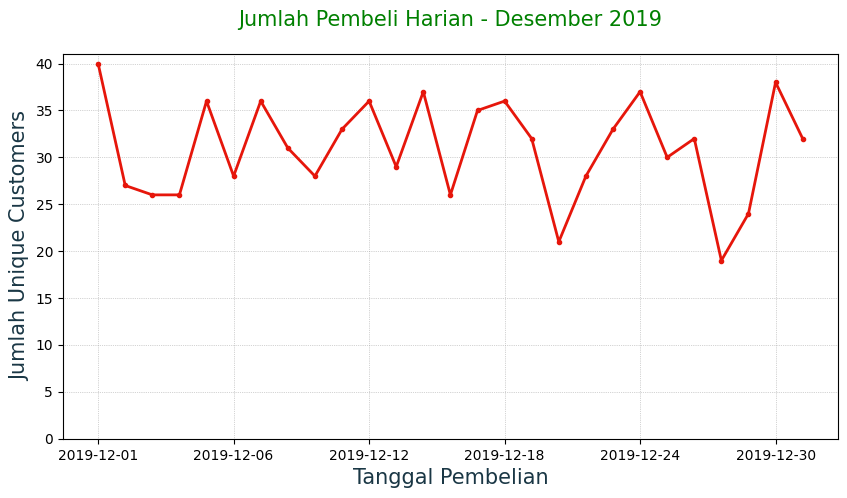

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset =pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset['order_month']=dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv']= dataset['item_price']*dataset['quantity']

plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='#e6160b', marker='.', linewidth=2)
plt.title('Jumlah Pembeli Harian - Desember 2019', loc='center', pad=20, fontsize=15, color='green')
plt.xlabel('Tanggal Pembelian', fontsize=15, color='#1a3745')
plt.ylabel('Jumlah Unique Customers', fontsize=15, color='#1a3745')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

In [ ]:
#Case 1
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset =pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset['order_month']=dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv']= dataset['item_price']*dataset['quantity']
brand_top = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

dataset_top5= dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(brand_top['brand'].to_list()))]
print(brand_top)


     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


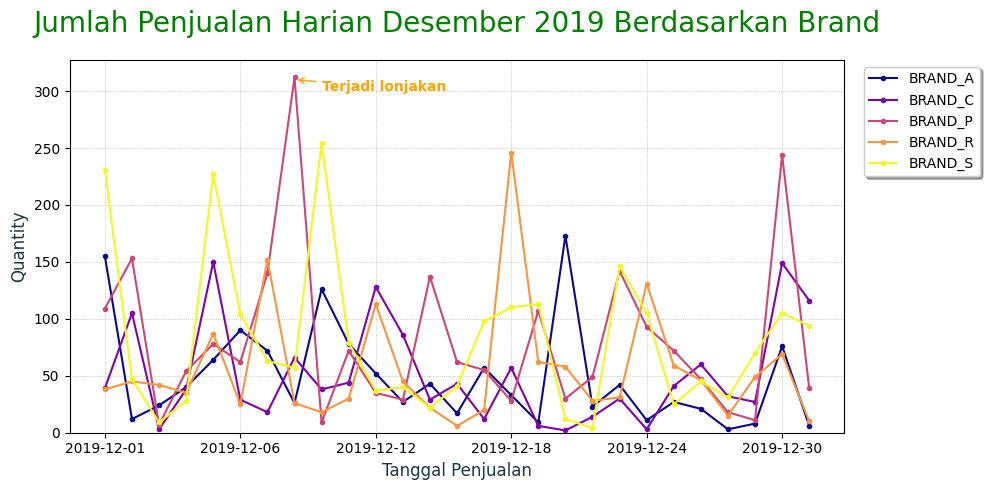

In [ ]:
#Case 2
dataset_top5.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Jumlah Penjualan Harian Desember 2019 Berdasarkan Brand',loc='center',pad=20, fontsize=20, color='green')
plt.xlabel('Tanggal Penjualan', fontsize = 12, color='#1a3745')
plt.ylabel('Quantity',fontsize = 12, color='#1a3745')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='orange',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='orange'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

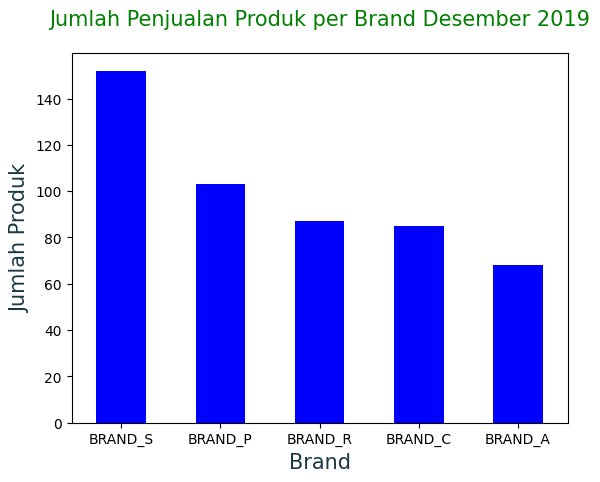

In [ ]:
#Case 3
dataset_top5.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Jumlah Penjualan Produk per Brand Desember 2019',loc='center',pad=20, fontsize=15, color='green')
plt.xlabel('Brand', fontsize = 15, color='#1a3745')
plt.ylabel('Jumlah Produk',fontsize = 15, color='#1a3745')
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

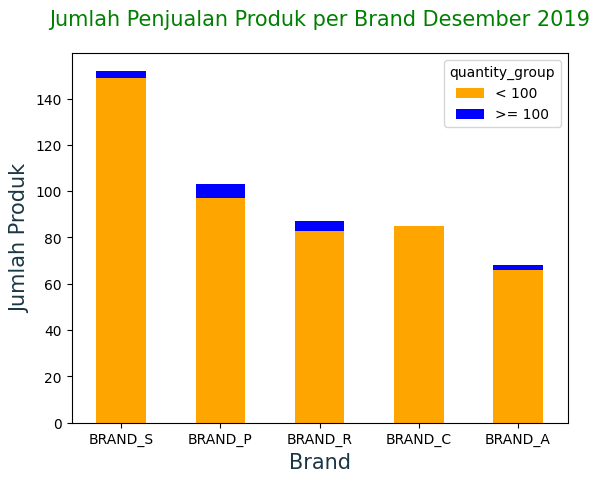

In [3]:
#Case 4
dataset_top5_perproduct = dataset_top5.groupby(['brand','product_id'])['quantity'].sum().reset_index()
dataset_top5_perproduct['quantity_group'] = dataset_top5_perproduct['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5_perproduct.sort_values('quantity',ascending=False,inplace=True)

s_sort = dataset_top5_perproduct.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

dataset_top5_perproduct.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True, color=('orange', 'blue'))
plt.title('Jumlah Penjualan Produk per Brand Desember 2019',loc='center',pad=20, fontsize=15, color='green')
plt.xlabel('Brand', fontsize = 15, color='#1a3745')
plt.ylabel('Jumlah Produk',fontsize = 15, color='#1a3745')
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

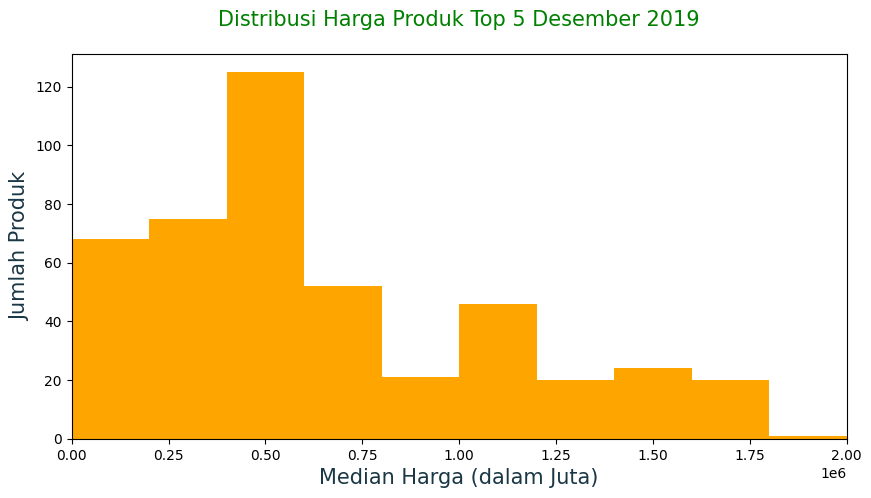

In [ ]:
#Case 5
plt.figure(figsize=(10,5))
plt.hist(dataset_top5.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='orange')
plt.title('Distribusi Harga Produk Top 5 Desember 2019',pad=20 , fontsize=15, color='green')
plt.xlabel('Median Harga (dalam Juta)', fontsize = 15, color='#1a3745')
plt.ylabel('Jumlah Produk',fontsize = 15, color='#1a3745')
plt.xlim(xmin=0,xmax=2000000)
plt.show()

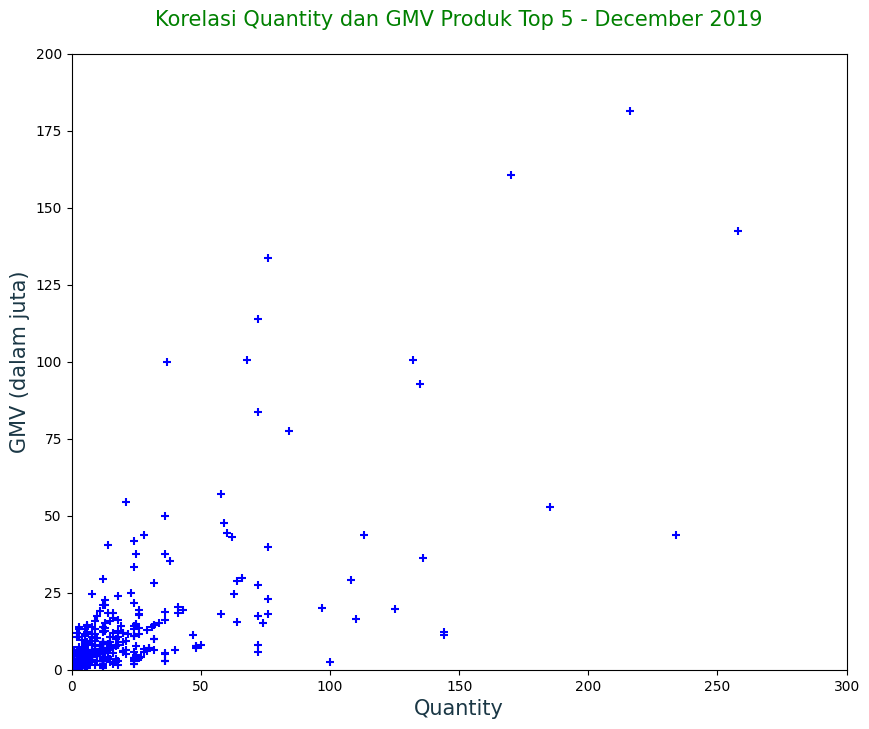

In [ ]:
#Case 6a
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset =pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset['order_month']=dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv']= dataset['item_price']*dataset['quantity']
brand_top = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

dataset_top5= dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(brand_top['brand'].to_list()))]

data_perproduct_top5= dataset_top5.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

plt.figure(figsize=(10,8))
plt.scatter(data_perproduct_top5['quantity'],data_perproduct_top5['gmv'], marker='+', color='blue')
plt.title('Korelasi Quantity dan GMV Produk Top 5 - December 2019',pad=20, fontsize=15, color='green')
plt.xlabel('Quantity', fontsize = 15, color='#1a3745')
plt.ylabel('GMV (dalam juta)',fontsize = 15, color='#1a3745')
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

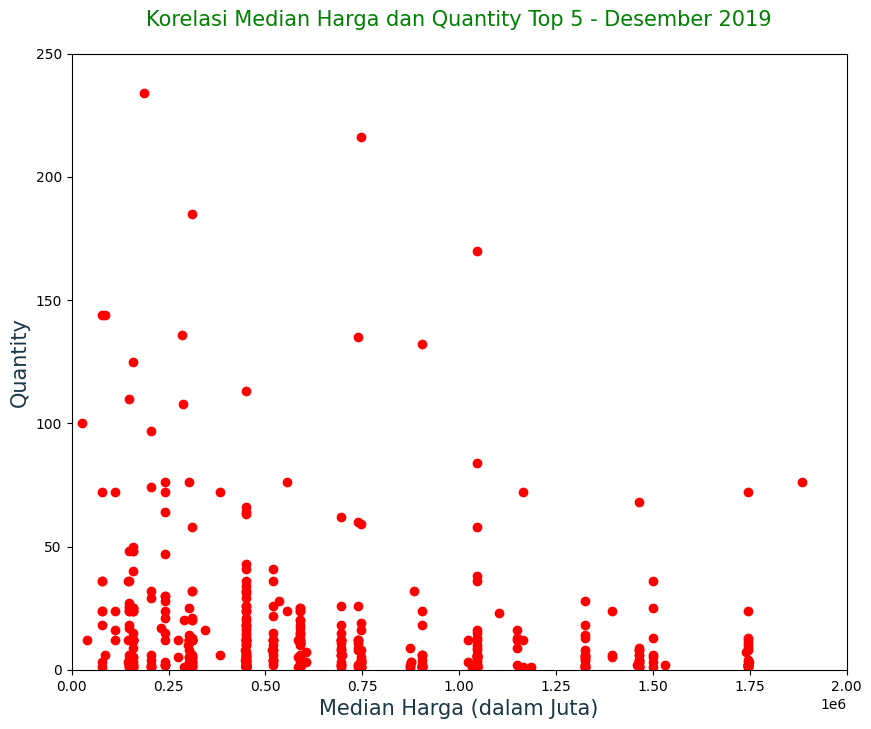

In [ ]:
#Case 6b
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset =pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset['order_month']=dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv']= dataset['item_price']*dataset['quantity']
brand_top = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5= dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(brand_top['brand'].to_list()))]
data_perproduct_top5 = dataset_top5.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

plt.figure(figsize=(10,8))
plt.scatter(data_perproduct_top5['item_price'],data_perproduct_top5['quantity'], marker='o', color='red')
plt.title('Korelasi Median Harga dan Quantity Top 5 - Desember 2019', pad=20, fontsize=15, color='green')
plt.xlabel('Median Harga (dalam Juta)', fontsize = 15, color='#1a3745')
plt.ylabel('Quantity',fontsize = 15, color='#1a3745')
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()